In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')
# Subset the dataframe by selecting features of interest
cols = ['MonthlyLoanPayment', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
loan = loans[cols]
# data wrangling, remove loans with missing borrower APR information
loan = loan[~loan.BorrowerAPR.isna()]
# data wrangling, remove loans with stated monthly income greater than 30k, which are outliers
loan = loan[loan.StatedMonthlyIncome<=30000]
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['AA', 'A', 'B', 'c', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan['EmploymentStatus'] = loan['EmploymentStatus'].astype(ordered_var)
loan.shape

(113585, 6)

## Distribution of Borrower APR
The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

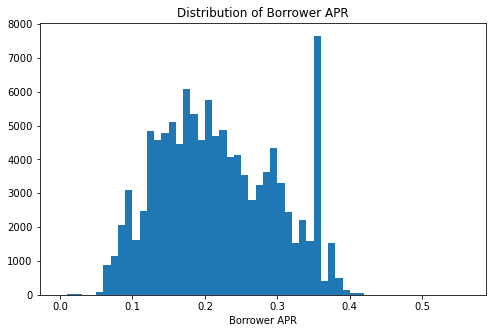

In [3]:
bins = np.arange(0, loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.title('Distribution of Borrower APR');

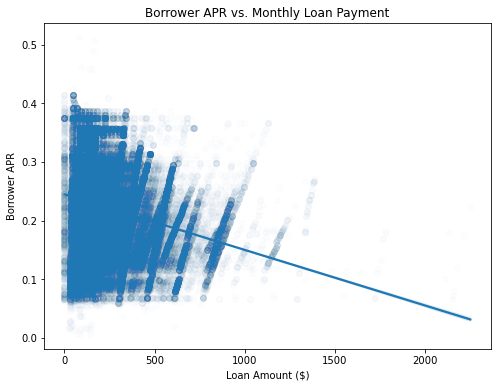

In [4]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan, x = 'MonthlyLoanPayment', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Monthly Loan Payment');

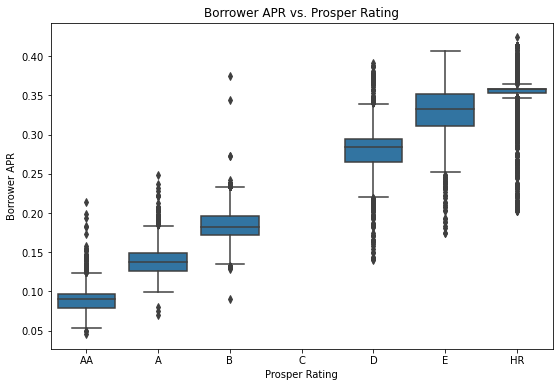

In [5]:
plt.figure(figsize=[9,6])
default_color = sb.color_palette()[0]
rate_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sb.boxplot(data=loan, x='ProsperRating (Alpha)', y='BorrowerAPR', color=default_color, order = rate_order)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 701150 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Admin\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Admin\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Admin\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Admin\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_